**Existing Mobile Parks in Los Angeles County**

This notebook explores data from exisiting mobile home parks in Los Angeles County. The goal is to develop descriptive stastics to determine some existing conditions for existing mobile home parks. 

**Import Libraries**

In [1]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
open_mhp = gpd.read_file('data/MHP_geocoded.geojson')

I will see how many rows and columns of data I have

In [4]:
open_mhp.shape

(374, 16)

*I have 374 rows and 16 columns*

More information about the data...

In [5]:
open_mhp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           374 non-null    object  
 1   County              374 non-null    object  
 2   Park Identifier     374 non-null    object  
 3   Park Address        374 non-null    object  
 4   City                374 non-null    object  
 5   Zip                 374 non-null    object  
 6   Phone               367 non-null    object  
 7   Fire Authority      374 non-null    object  
 8   Jurisdiction        374 non-null    object  
 9   MH Spaces           374 non-null    int64   
 10  RV Lots W/Drains    374 non-null    int64   
 11  RV Lots W/O Drains  374 non-null    int64   
 12  Operated by         374 non-null    object  
 13  lat                 374 non-null    float64 
 14  lon                 374 non-null    float64 
 15  geometry            374 non-null

In [6]:
open_mhp.head()

Park Name       County Park Identifier  \
0      CHETS TRAILER PARK  LOS ANGELES      19-0001-MP   
1        ACE TRAILER PARK  LOS ANGELES      19-0006-MP   
2                ACORN TP  LOS ANGELES      19-0009-MP   
3  AZUSA MOBILE HOME PARK  LOS ANGELES      19-0039-MP   
4     CULVER CITY TERRACE  LOS ANGELES      19-0044-MP   

                                  Park Address           City    Zip  \
0  4630 W ROSECRANS AVE ,  LAWNDALE,  CA 90260       LAWNDALE  90260   
1   6508 FLORENCE PL,  BELL GARDENS,  CA 90201   BELL GARDENS  90201   
2        2818 DURFEE AVE,  EL MONTE,  CA 91732       EL MONTE  91732   
3           812 N LOREN AVE,  AZUSA,  CA 91702          AZUSA  91702   
4      11250 PLAYA ST,  CULVER CITY,  CA 90230    CULVER CITY  90230   

             Phone                                     Fire Authority  \
0   (310) 676-0663  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
1   (213) 927-2868  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
2   (818) 350-5235  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
3   (626) 334-2306  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
4   (213) 398-3761  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   

                                        Jurisdiction  MH Spaces  \
0  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         49   
1  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...          8   
2  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         20   
3  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         46   
4  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        117   

   RV Lots W/Drains  RV Lots W/O Drains  \
0                 0                   0   
1                 0                   0   
2                 0                   0   
3                 0                   0   
4                 0                   0   

                                         Operated by        lat         lon  \
0  DOSHI, NAVINCHANDRA, 6418 SPRING PARK AVE, LOS...  33.901817 -118.357847   
1  LUELLA PERDEW REVOCABLE TRUST, PO BOX 3259, WI...  33.966128 -118.149340   
2  PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...  34.056116 -118.017002   
3  KENDALL AZUSA COMMUNITIES LLC, 17300 RED HILL ...  34.136405 -117.923652   
4  CULVER CITY MOBILEHOME OWNERS ASSOCIATION, C/O...  33.992145 -118.391855   

                      geometry  
0  POINT (-118.35785 33.90182)  
1  POINT (-118.14934 33.96613)  
2  POINT (-118.01700 34.05612)  
3  POINT (-117.92365 34.13640)  
4  POINT (-118.39186 33.99215)

Next, I will plot the data

<AxesSubplot:>

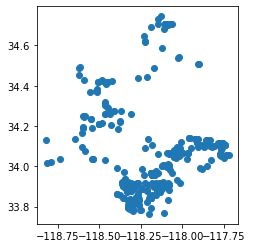

In [7]:
open_mhp.plot()

*This output shows me the coordinates for open MHP. Since I want to explore by location I will do some amalysis by city.*

In [8]:
open_mhp['City'].value_counts()

 EL MONTE         29
 LANCASTER        22
 BELLFLOWER       20
 GARDENA          20
 POMONA           15
                  ..
 LYNWOOD           1
 LAKEWOOD          1
 SANTA MONICA      1
 MONTEREY PARK     1
 WEST COVINA       1
Name: City, Length: 74, dtype: int64

*I will save city as a varible that I can use in further exploration*

In [9]:
city_count = open_mhp['City'].value_counts()

In [10]:
city_count

 EL MONTE         29
 LANCASTER        22
 BELLFLOWER       20
 GARDENA          20
 POMONA           15
                  ..
 LYNWOOD           1
 LAKEWOOD          1
 SANTA MONICA      1
 MONTEREY PARK     1
 WEST COVINA       1
Name: City, Length: 74, dtype: int64

**Now we can start pulling some descriptitve statistics**

<AxesSubplot:title={'center':'Number of Mobile Home Parks per City'}>

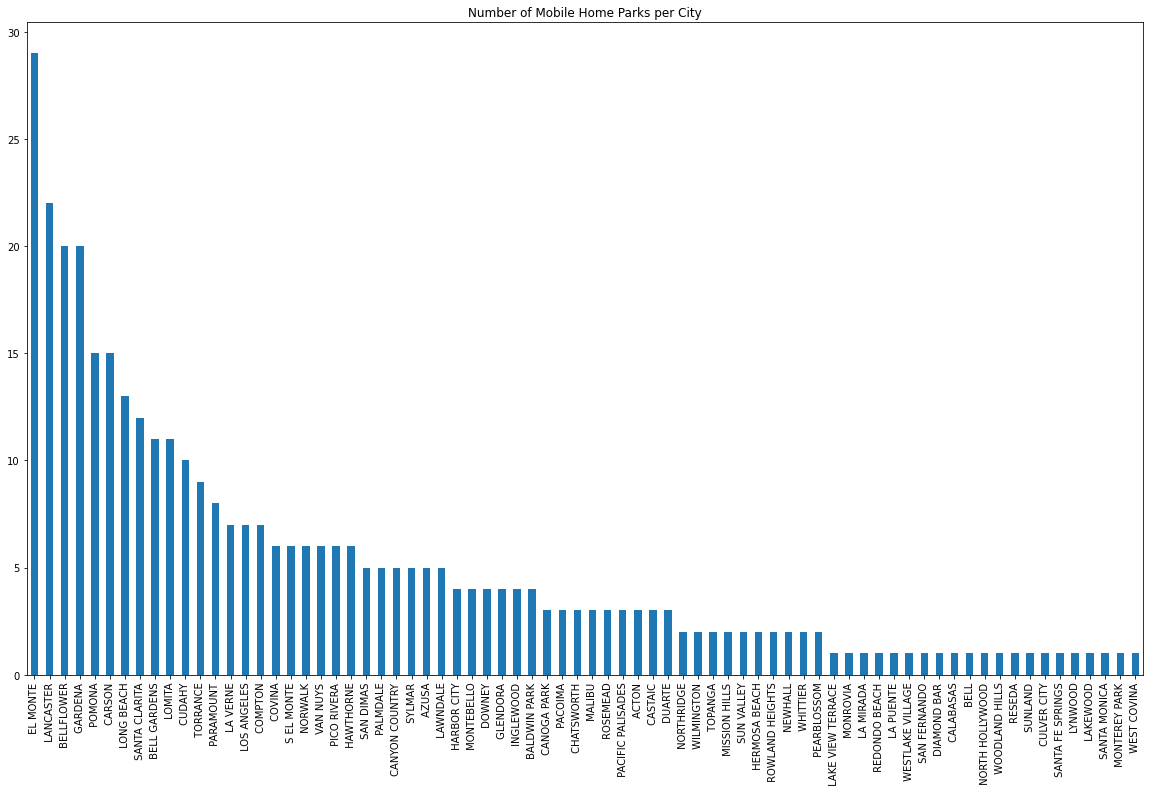

In [11]:
city_count.plot.bar(
    figsize=(20,12), x = 'City', y = 'count', title = 'Number of Mobile Home Parks per City')

**Data Values**

I want to look at the value options/ counts in some of the colums

In [12]:
open_mhp

Park Name       County Park Identifier  \
0        CHETS TRAILER PARK  LOS ANGELES      19-0001-MP   
1          ACE TRAILER PARK  LOS ANGELES      19-0006-MP   
2                  ACORN TP  LOS ANGELES      19-0009-MP   
3    AZUSA MOBILE HOME PARK  LOS ANGELES      19-0039-MP   
4       CULVER CITY TERRACE  LOS ANGELES      19-0044-MP   
..                      ...          ...             ...   
369        STALLION MEADOWS  LOS ANGELES      19-1568-MP   
370                LACO MHP  LOS ANGELES      19-1572-MP   
371             WALNUT PARK  LOS ANGELES      19-1575-MP   
372       DELSUR GARDENS TP  LOS ANGELES      19-1576-MP   
373    GOLDEN SHORE RV PARK  LOS ANGELES      19-1578-MP   

                                    Park Address           City    Zip  \
0    4630 W ROSECRANS AVE ,  LAWNDALE,  CA 90260       LAWNDALE  90260   
1     6508 FLORENCE PL,  BELL GARDENS,  CA 90201   BELL GARDENS  90201   
2          2818 DURFEE AVE,  EL MONTE,  CA 91732       EL MONTE  91732   
3             812 N LOREN AVE,  AZUSA,  CA 91702          AZUSA  91702   
4        11250 PLAYA ST,  CULVER CITY,  CA 90230    CULVER CITY  90230   
..                                           ...            ...    ...   
369         33105 SANTIAGO RD,  ACTON,  CA 93510          ACTON  93510   
370          22325 S MAIN ST,  CARSON,  CA 90745         CARSON  90745   
371    19130 NORDHOFF ST,  NORTHRIDGE,  CA 91324     NORTHRIDGE  91324   
372          9020 W AVE J,  LANCASTER,  CA 93536      LANCASTER  93536   
373     101 GOLDEN SHORE,  LONG BEACH,  CA 90802     LONG BEACH  90802   

               Phone                                     Fire Authority  \
0     (310) 676-0663  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
1     (213) 927-2868  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
2     (818) 350-5235  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
3     (626) 334-2306  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
4     (213) 398-3761  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   
..               ...                                                ...   
369   (805) 269-1182  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
370   (818) 285-9823  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
371   (562) 434-9195  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   
372   (805) 943-5434  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
373             None  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   

                                          Jurisdiction  MH Spaces  \
0    HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         49   
1    HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...          8   
2    HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         20   
3    HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         46   
4    HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        117   
..                                                 ...        ...   
369  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        154   
370  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         94   
371  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...          0   
372  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...          0   
373  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...          0   

     RV Lots W/Drains  RV Lots W/O Drains  \
0                   0                   0   
1                   0                   0   
2                   0                   0   
3                   0                   0   
4                   0                   0   
..                ...                 ...   
369                 0                   0   
370                 0                   0   
371               114                   0   
372                42                   0   
373                77                   0   

                                           Operated by        lat         lon  \
0    DOSHI, NAVINCHANDRA, 6418 SPRING PARK AVE, LOS...  

In [13]:
open_mhp['MH Spaces'].describe()

count    374.000000
mean      80.403743
std       90.639255
min        0.000000
25%       20.000000
50%       46.500000
75%      107.000000
max      600.000000
Name: MH Spaces, dtype: float64

*This tells me MHP in LA County have an average amount of 80 mobile homes per park.* 

<AxesSubplot:ylabel='Frequency'>

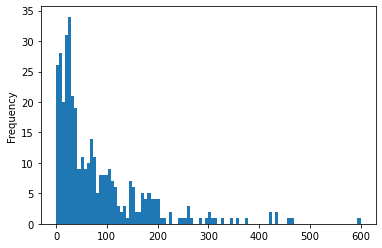

In [14]:
open_mhp['MH Spaces'].plot.hist(bins=100)

Now I'm going to try to visualize some of this data

<function contextily.plotting.add_basemap(ax, zoom='auto', source=None, interpolation='bilinear', attribution=None, attribution_size=8, reset_extent=True, crs=None, resampling=<Resampling.bilinear: 1>, url=None, **extra_imshow_args)>

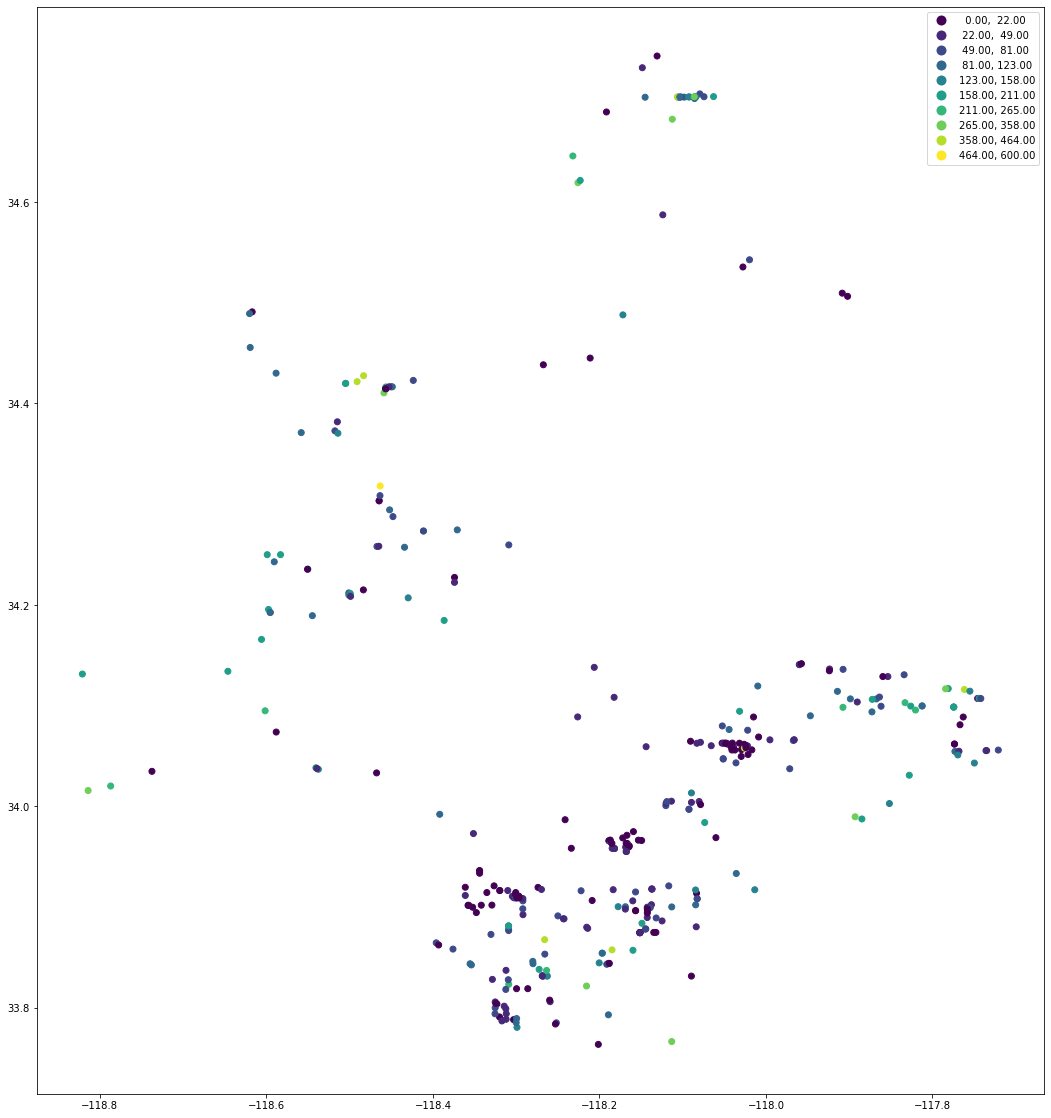

In [17]:
open_mhp.plot(figsize=(20,20), column = 'MH Spaces', legend = True, scheme = 'NaturalBreaks',k=10)
ctx.add_basemap

Now, I know that MHP parks across the County have different amounts of mobile homes per park. So I want visualize that data...

In [18]:
mhspaces = open_mhp.to_crs(epsg=3857)

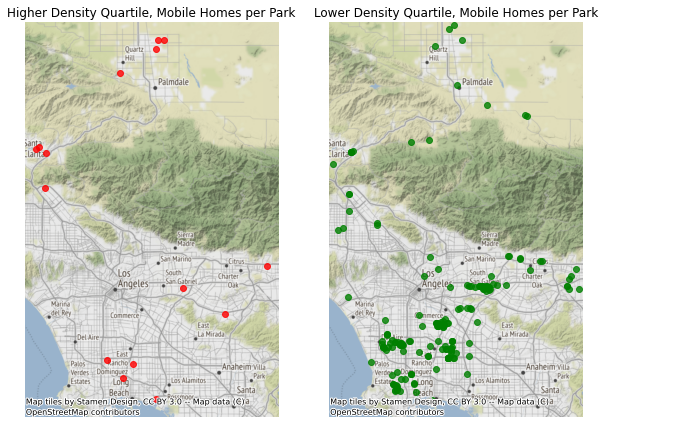

In [19]:
fix, axs = plt.subplots(1,2,sharex = True,sharey = True, figsize=(10,10))
ax1, ax2 = axs
mhspaces[mhspaces['MH Spaces']>300].plot(ax=ax1,alpha=0.8,color="red")
ax1.axis('off')
ax1.set_title("Higher Density Quartile, Mobile Homes per Park")
ctx.add_basemap(ax1)

mhspaces[mhspaces['MH Spaces']<50].plot(ax=ax2,alpha=0.8,color="green")
ax2.axis('off')
ax2.set_title("Lower Density Quartile, Mobile Homes per Park")
ctx.add_basemap(ax2)

I created two maps, lower density for parks that have less than 50 mobile homes and high density for those that have 300 or more mobile homes. I can see that there are more parks with lower density (which was expected based on the histogram I cretaed earlier). Something interesting is that the MHP found closer to the coast are lower desnity. 

In [21]:
open_mhp.head()

Park Name       County Park Identifier  \
0      CHETS TRAILER PARK  LOS ANGELES      19-0001-MP   
1        ACE TRAILER PARK  LOS ANGELES      19-0006-MP   
2                ACORN TP  LOS ANGELES      19-0009-MP   
3  AZUSA MOBILE HOME PARK  LOS ANGELES      19-0039-MP   
4     CULVER CITY TERRACE  LOS ANGELES      19-0044-MP   

                                  Park Address           City    Zip  \
0  4630 W ROSECRANS AVE ,  LAWNDALE,  CA 90260       LAWNDALE  90260   
1   6508 FLORENCE PL,  BELL GARDENS,  CA 90201   BELL GARDENS  90201   
2        2818 DURFEE AVE,  EL MONTE,  CA 91732       EL MONTE  91732   
3           812 N LOREN AVE,  AZUSA,  CA 91702          AZUSA  91702   
4      11250 PLAYA ST,  CULVER CITY,  CA 90230    CULVER CITY  90230   

             Phone                                     Fire Authority  \
0   (310) 676-0663  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
1   (213) 927-2868  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
2   (818) 350-5235  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
3   (626) 334-2306  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
4   (213) 398-3761  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   

                                        Jurisdiction  MH Spaces  \
0  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         49   
1  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...          8   
2  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         20   
3  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...         46   
4  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        117   

   RV Lots W/Drains  RV Lots W/O Drains  \
0                 0                   0   
1                 0                   0   
2                 0                   0   
3                 0                   0   
4                 0                   0   

                                         Operated by        lat         lon  \
0  DOSHI, NAVINCHANDRA, 6418 SPRING PARK AVE, LOS...  33.901817 -118.357847   
1  LUELLA PERDEW REVOCABLE TRUST, PO BOX 3259, WI...  33.966128 -118.149340   
2  PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...  34.056116 -118.017002   
3  KENDALL AZUSA COMMUNITIES LLC, 17300 RED HILL ...  34.136405 -117.923652   
4  CULVER CITY MOBILEHOME OWNERS ASSOCIATION, C/O...  33.992145 -118.391855   

                      geometry  
0  POINT (-118.35785 33.90182)  
1  POINT (-118.14934 33.96613)  
2  POINT (-118.01700 34.05612)  
3  POINT (-117.92365 34.13640)  
4  POINT (-118.39186 33.99215)

Based on the data I know that there are also RVs in MHP, so i'm going to go ahead and add the total unit counts and put that in a new column. First I'll change them from integers to floats.

In [22]:
open_mhp['MH Spaces'] = open_mhp['MH Spaces'].astype(float)
open_mhp['RV Lots W/Drains'] = open_mhp['RV Lots W/Drains'].astype(float)
open_mhp['RV Lots W/O Drains'] = open_mhp['RV Lots W/O Drains'].astype(float)
open_mhp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Park Name           374 non-null    object  
 1   County              374 non-null    object  
 2   Park Identifier     374 non-null    object  
 3   Park Address        374 non-null    object  
 4   City                374 non-null    object  
 5   Zip                 374 non-null    object  
 6   Phone               367 non-null    object  
 7   Fire Authority      374 non-null    object  
 8   Jurisdiction        374 non-null    object  
 9   MH Spaces           374 non-null    float64 
 10  RV Lots W/Drains    374 non-null    float64 
 11  RV Lots W/O Drains  374 non-null    float64 
 12  Operated by         374 non-null    object  
 13  lat                 374 non-null    float64 
 14  lon                 374 non-null    float64 
 15  geometry            374 non-null

In [23]:
open_mhp['total'] = open_mhp['MH Spaces'] +open_mhp['RV Lots W/Drains'] + open_mhp['RV Lots W/O Drains']
open_mhp.head()

Park Name       County Park Identifier  \
0      CHETS TRAILER PARK  LOS ANGELES      19-0001-MP   
1        ACE TRAILER PARK  LOS ANGELES      19-0006-MP   
2                ACORN TP  LOS ANGELES      19-0009-MP   
3  AZUSA MOBILE HOME PARK  LOS ANGELES      19-0039-MP   
4     CULVER CITY TERRACE  LOS ANGELES      19-0044-MP   

                                  Park Address           City    Zip  \
0  4630 W ROSECRANS AVE ,  LAWNDALE,  CA 90260       LAWNDALE  90260   
1   6508 FLORENCE PL,  BELL GARDENS,  CA 90201   BELL GARDENS  90201   
2        2818 DURFEE AVE,  EL MONTE,  CA 91732       EL MONTE  91732   
3           812 N LOREN AVE,  AZUSA,  CA 91702          AZUSA  91702   
4      11250 PLAYA ST,  CULVER CITY,  CA 90230    CULVER CITY  90230   

             Phone                                     Fire Authority  \
0   (310) 676-0663  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
1   (213) 927-2868  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
2   (818) 350-5235  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
3   (626) 334-2306  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
4   (213) 398-3761  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...   

                                        Jurisdiction  MH Spaces  \
0  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       49.0   
1  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        8.0   
2  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       20.0   
3  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       46.0   
4  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...      117.0   

   RV Lots W/Drains  RV Lots W/O Drains  \
0               0.0                 0.0   
1               0.0                 0.0   
2               0.0                 0.0   
3               0.0                 0.0   
4               0.0                 0.0   

                                         Operated by        lat         lon  \
0  DOSHI, NAVINCHANDRA, 6418 SPRING PARK AVE, LOS...  33.901817 -118.357847   
1  LUELLA PERDEW REVOCABLE TRUST, PO BOX 3259, WI...  33.966128 -118.149340   
2  PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...  34.056116 -118.017002   
3  KENDALL AZUSA COMMUNITIES LLC, 17300 RED HILL ...  34.136405 -117.923652   
4  CULVER CITY MOBILEHOME OWNERS ASSOCIATION, C/O...  33.992145 -118.391855   

                      geometry  total  
0  POINT (-118.35785 33.90182)   49.0  
1  POINT (-118.14934 33.96613)    8.0  
2  POINT (-118.01700 34.05612)   20.0  
3  POINT (-117.92365 34.13640)   46.0  
4  POINT (-118.39186 33.99215)  117.0

**Descriptive Statistics**

In [24]:
open_mhp['MH Spaces'].describe()

count    374.000000
mean      80.403743
std       90.639255
min        0.000000
25%       20.000000
50%       46.500000
75%      107.000000
max      600.000000
Name: MH Spaces, dtype: float64

In [25]:
open_mhp['RV Lots W/Drains'].describe()

count    374.000000
mean       5.149733
std       37.507948
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      641.000000
Name: RV Lots W/Drains, dtype: float64

In [26]:
open_mhp['RV Lots W/O Drains'].describe()

count    374.000000
mean       1.339572
std       20.133594
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      385.000000
Name: RV Lots W/O Drains, dtype: float64

In [27]:
open_mhp['total'].describe()

count     374.000000
mean       86.893048
std       102.135899
min         3.000000
25%        24.250000
50%        52.000000
75%       113.750000
max      1026.000000
Name: total, dtype: float64

Some interesting take aways, seems like there isn't a significant amount of RVs wihtout drains in our MHP. However, I'm going to chart out how MHP units break out to have some visual descriptive statistics for this. 

In [28]:
mhp_total = open_mhp['total'].sum()
print('Total Mobile Home Park Units: ' + str(mhp_total))

mh_total = open_mhp['MH Spaces'].sum()
mh_per = ((mh_total/mhp_total)*100)
print('Mobile Homes: ' + str(mh_total))
print('Mobile Homes percent: ' + str(mh_per))

rv_total = open_mhp['RV Lots W/Drains'].sum()
rv_per = ((rv_total/mhp_total)*100)
print('RVs: ' + str(rv_total))
print('RVs with Drains percent: ' + str(rv_per))

rvnodrain_total = open_mhp['RV Lots W/O Drains'].sum()
rvnodrain_per = ((rvnodrain_total/mhp_total)*100)
print('RVs no Drains: ' + str(rvnodrain_total))
print('RVs wihtout Drains percent: ' + str(rvnodrain_per))

Total Mobile Home Park Units: 32498.0
Mobile Homes: 30071.0
Mobile Homes percent: 92.53184811373008
RVs: 1926.0
RVs with Drains percent: 5.926518554987999
RVs no Drains: 501.0
RVs wihtout Drains percent: 1.541633331281925


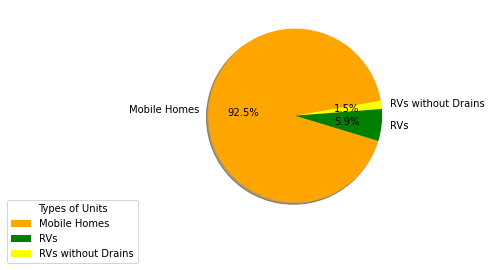

In [29]:
labels = ['Mobile Homes','RVs','RVs without Drains']
sizes = [mh_total,rv_total,rvnodrain_total]
explode = (0,0,0.1) # I want my chunk to stick out

fig1, rent = plt.subplots()
rent.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=10, colors = ['orange','green','yellow'])
rent.legend(loc = 'lower right',bbox_to_anchor = (-0.2,-0.2),title = "Types of Units")

plt.show()

As expected, the highest amounts of units are mobile homes. This also shows us that the data focuses on residential MHP rather than those used for recreational/ camping RVs.

**Mapping**

In [30]:
from geopandas import GeoDataFrame
existing = GeoDataFrame(open_mhp)
type(existing)

geopandas.geodataframe.GeoDataFrame

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1718: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:1719: UserWarning: Warning: setting k to 8
  Warn("Warning: setting k to %d" % uvk, UserWarning)


<AxesSubplot:>

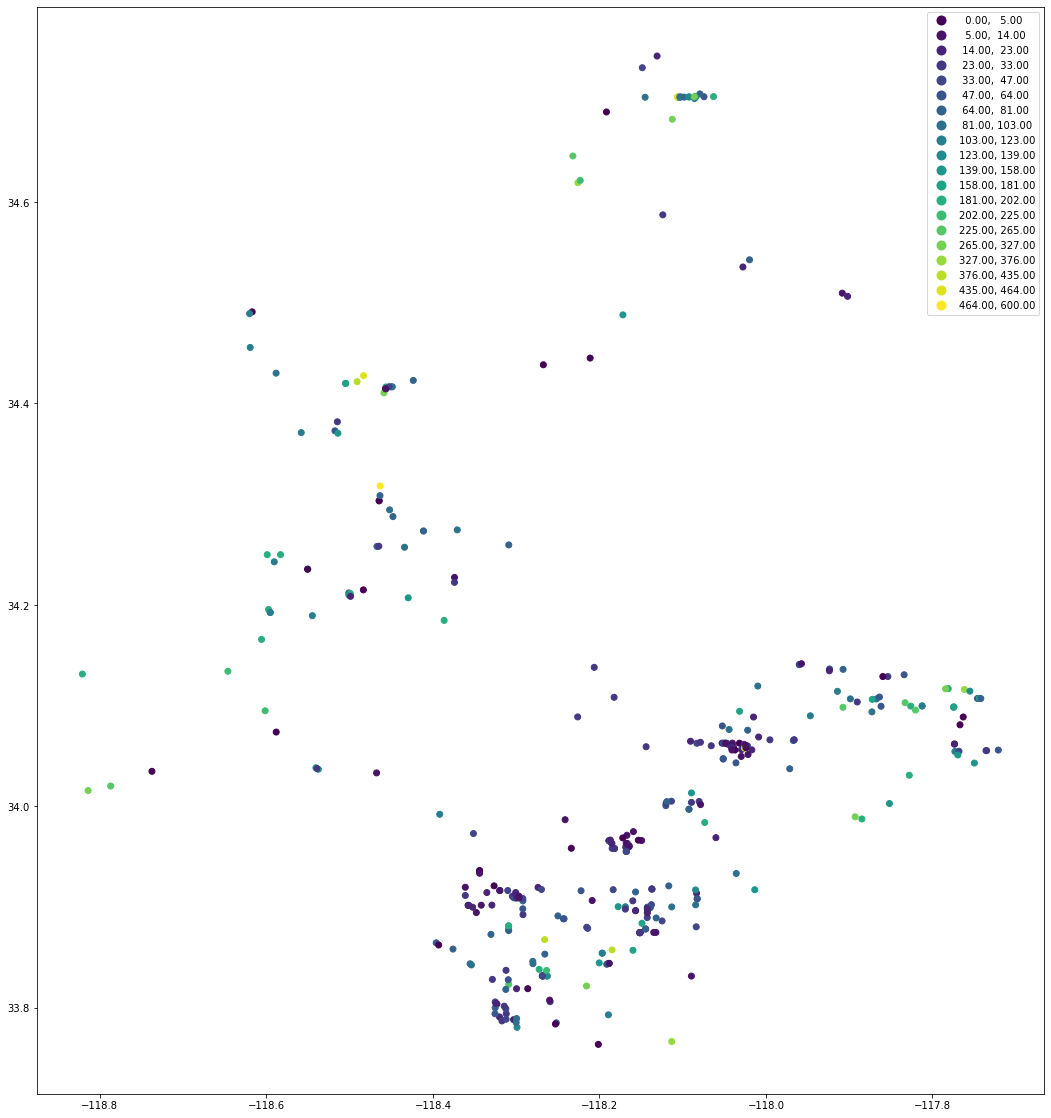

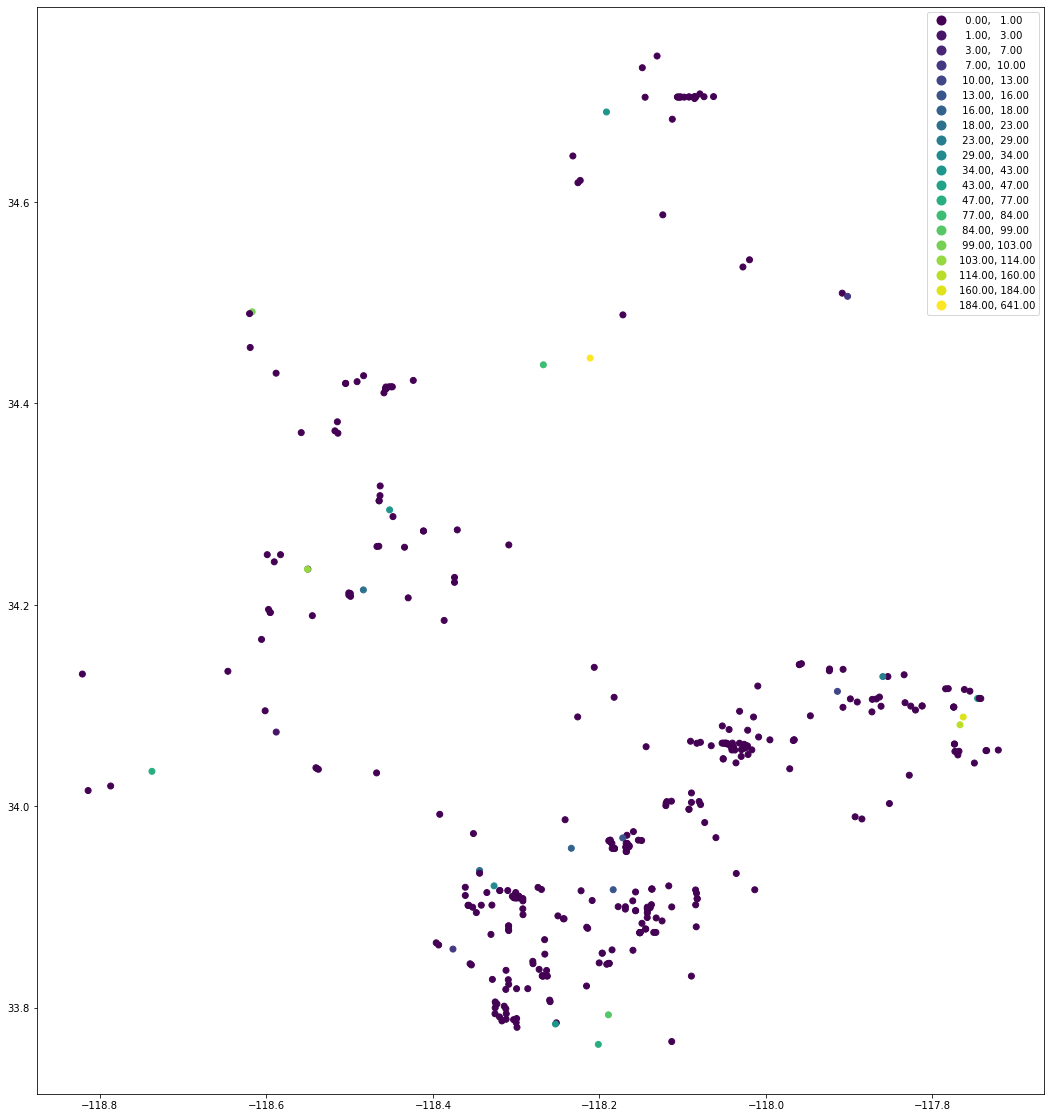

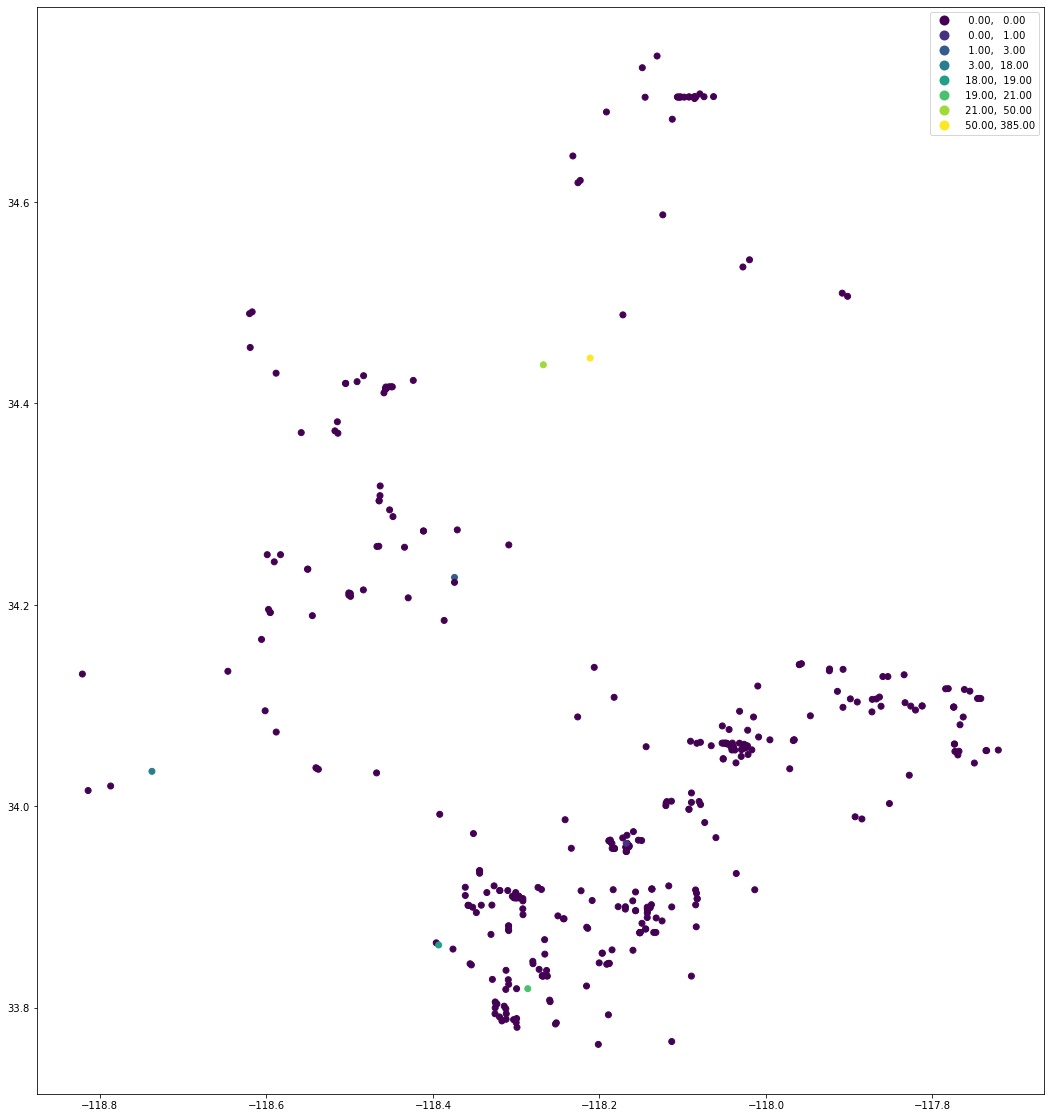

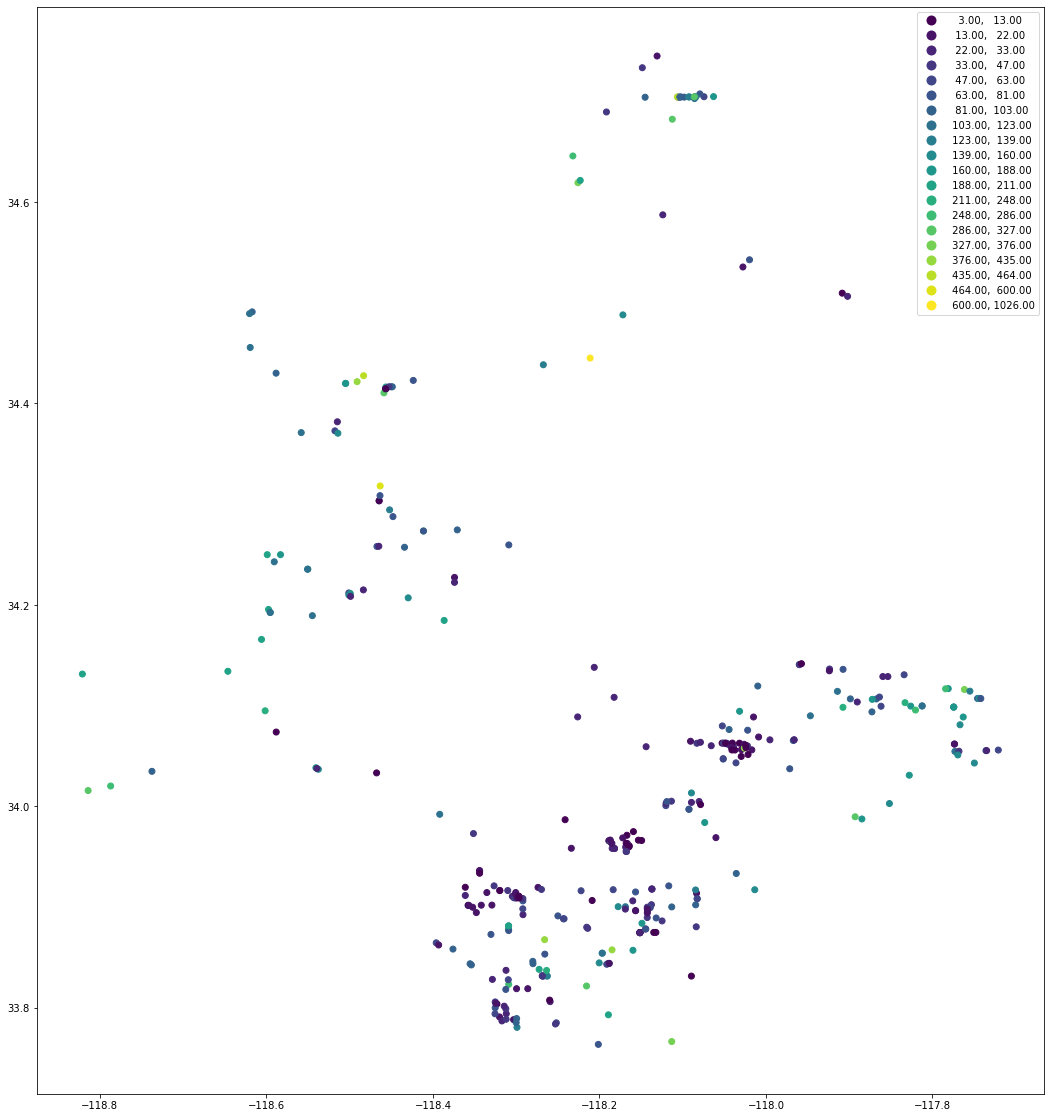

In [31]:
existing.plot(figsize=(20,20), column = 'MH Spaces', legend = True, scheme = 'NaturalBreaks',k=20)
existing.plot(figsize=(20,20), column = 'RV Lots W/Drains', legend = True, scheme = 'NaturalBreaks',k=20)
existing.plot(figsize=(20,20), column = 'RV Lots W/O Drains', legend = True, scheme = 'NaturalBreaks',k=20)
existing.plot(figsize=(20,20), column = 'total', legend = True, scheme = 'NaturalBreaks',k=20)

These maps are helpful because I can see the amount by type of unit, yet they are not as clear without a basemap. Moving foreward, I'll add basemaps so that they are more intuitive. Let's try to elaborate and see if we can create our maps with this data. 

**Interactive Maps**

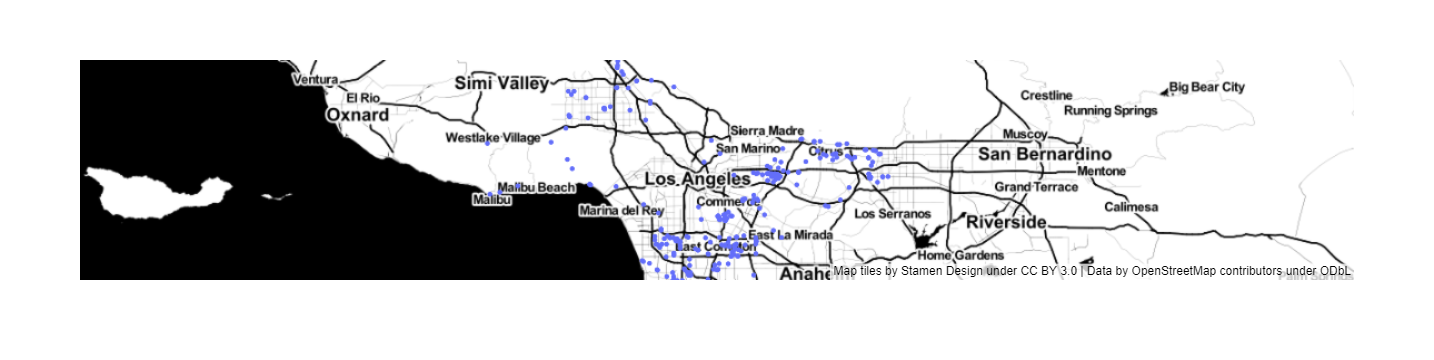

In [32]:
fig = px.scatter_mapbox(open_mhp,
                        lat='lat',
                        lon='lon',
                        mapbox_style="stamen-toner")
fig.show()

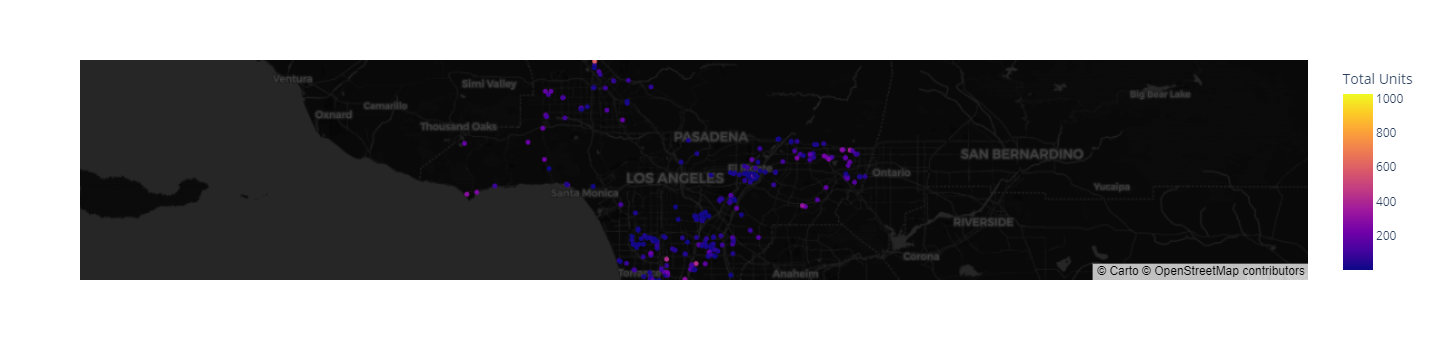

In [33]:
fig = px.scatter_mapbox(open_mhp, 
                        lat="lat", 
                        lon="lon", 
                        color="total",
                        labels={'total':'Total Units'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

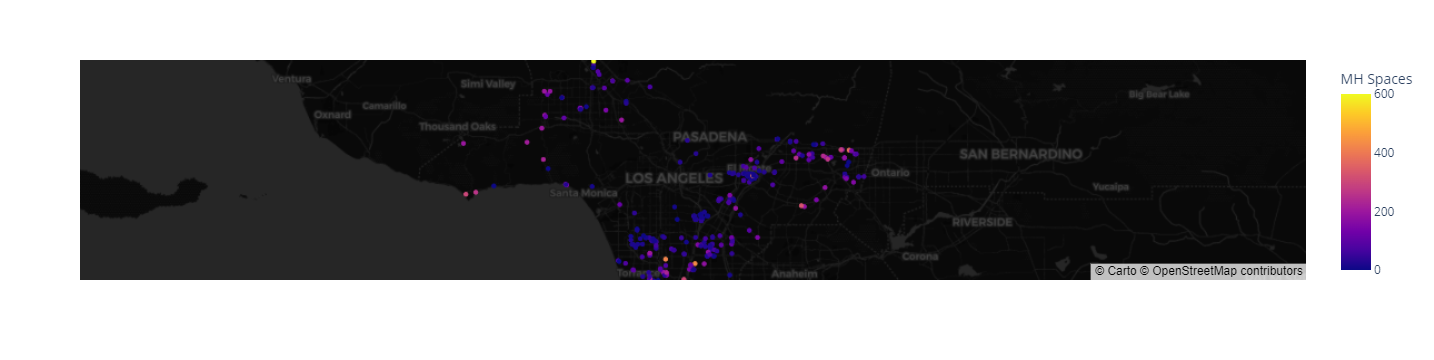

In [34]:
fig = px.scatter_mapbox(open_mhp, 
                        lat="lat", 
                        lon="lon", 
                        color="MH Spaces",
                        labels={'Mobile Homes':'Mobile Homes per Park'}
                       )

fig.update_layout(mapbox_style="carto-darkmatter")

fig.show()

**Functions and Loops**

In [37]:
#convert to geodataframe
geomhp = gpd.GeoDataFrame(open_mhp, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(open_mhp.lon, open_mhp.lat))

In [38]:
#what is the projection?
geomhp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
# reproject to web mercator
geomhp_web_mercator = geomhp.to_crs(epsg=3857)

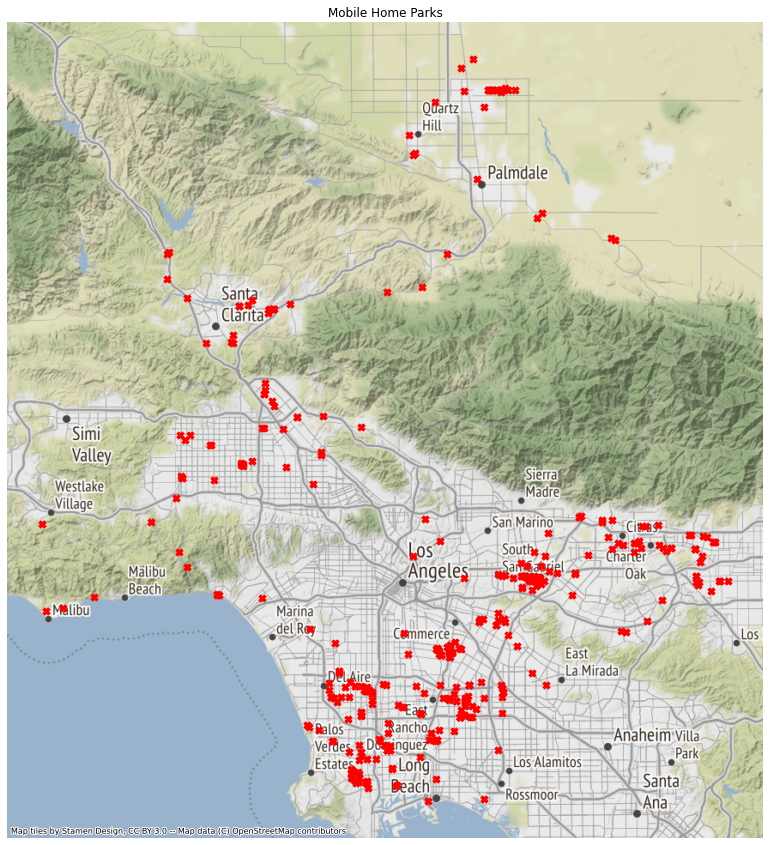

In [42]:
# map it
fig, ax = plt.subplots(figsize=(20,15))

geomhp_web_mercator.plot(ax=ax, 
                      marker='X',
                      markersize=50,
                      color='red')

ax.axis('off')

ax.set_title('Mobile Home Parks')

ctx.add_basemap(ax)

In [44]:
geomhp.City.value_counts()

 EL MONTE         29
 LANCASTER        22
 BELLFLOWER       20
 GARDENA          20
 POMONA           15
                  ..
 LYNWOOD           1
 LAKEWOOD          1
 SANTA MONICA      1
 MONTEREY PARK     1
 WEST COVINA       1
Name: City, Length: 74, dtype: int64

In [45]:
city_count

 EL MONTE         29
 LANCASTER        22
 BELLFLOWER       20
 GARDENA          20
 POMONA           15
                  ..
 LYNWOOD           1
 LAKEWOOD          1
 SANTA MONICA      1
 MONTEREY PARK     1
 WEST COVINA       1
Name: City, Length: 74, dtype: int64

In [46]:
geomhp.City

0           LAWNDALE
1       BELL GARDENS
2           EL MONTE
3              AZUSA
4        CULVER CITY
           ...      
369            ACTON
370           CARSON
371       NORTHRIDGE
372        LANCASTER
373       LONG BEACH
Name: City, Length: 374, dtype: object

In [47]:
top_10_city = geomhp.City.value_counts().head(10).index.tolist()
top_10_city

[' EL MONTE',
 ' LANCASTER',
 ' BELLFLOWER',
 ' GARDENA',
 ' POMONA',
 ' CARSON',
 ' LONG BEACH',
 ' SANTA CLARITA',
 ' BELL GARDENS',
 ' LOMITA']

In [49]:
geomhp[geomhp.City == ' EL MONTE'].head()

Park Name       County Park Identifier  \
2               ACORN TP  LOS ANGELES      19-0009-MP   
6      BEL AIRE MH LODGE  LOS ANGELES      19-0051-MP   
9          SHADY LANE MP  LOS ANGELES      19-0079-MP   
27             FELIPE TP  LOS ANGELES      19-0218-MP   
33  VICTORY TRAILER PARK  LOS ANGELES      19-0263-MP   

                                   Park Address       City    Zip  \
2         2818 DURFEE AVE,  EL MONTE,  CA 91732   EL MONTE  91732   
6      2336 LEXINGTON AVE,  EL MONTE,  CA 91731   EL MONTE  91731   
9   2532 MOUNTAIN VIEW RD,  EL MONTE,  CA 91731   EL MONTE  91731   
27        12328 FELIPE ST,  EL MONTE,  CA 91732   EL MONTE  91732   
33       11208 GARVEY AVE,  EL MONTE,  CA 91731   EL MONTE  91731   

              Phone                                     Fire Authority  \
2    (818) 350-5235  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
6    (310) 444-6411  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
9    (213) 585-8782  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
27   (818) 448-5849  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
33   (213) 539-2582  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   

                                         Jurisdiction  MH Spaces  \
2   HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       20.0   
6   HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       34.0   
9   HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       20.0   
27  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...       11.0   
33  HCD - SOUTHERN AREA OFFICE, 3737 MAIN ST 400, ...        3.0   

    RV Lots W/Drains  RV Lots W/O Drains  \
2                0.0                 0.0   
6                0.0                 0.0   
9                0.0                 0.0   
27               0.0                 0.0   
33               0.0                 0.0   

                                          Operated by        lat         lon  \
2   PATTERSON, GLEN, PO BOX 1811, MYRTLE CREEK, OR...  34.056116 -118.017002   
6   WONG ASSOCIATES, 444 S FLOWER ST, LOS ANGELES,...  34.059182 -118.038944   
9   GHUMAN, DASH, 2532 MOUNTAIN VIEW RD, EL MONTE,...  34.057399 -118.027922   
27  HUANG, CHU, 2440 S HACIENDA BLVD #132, HACIEND...  34.051500 -118.021539   
33  JACKSON, CHOW, 3112 SEAMAN AVE, EL MONTE, CA 9...  34.062747 -118.031829   

                       geometry  total  
2   POINT (-118.01700 34.05612)   20.0  
6   POINT (-118.03894 34.05918)   34.0  
9   POINT (-118.02792 34.05740)   20.0  
27  POINT (-118.02154 34.05150)   11.0  
33  POINT (-118.03183 34.06275)    3.0

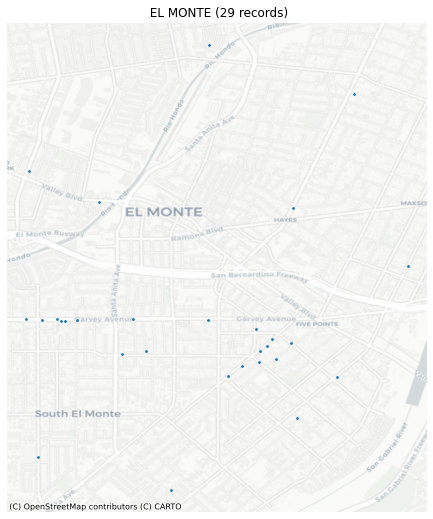

In [53]:
# crime variable
City = ' EL MONTE'

# map
ax = geomhp[geomhp.City == City].plot(figsize=(9,9), markersize=3)

# title (including count)
ax.set_title(City + ' (' + str(geomhp[geomhp.City == City].shape[0]) + ' records)')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [51]:
geomhp[geomhp.City == ' LANCASTER'].head()

Park Name       County Park Identifier  \
97        JOHNSONS MP  LOS ANGELES      19-0683-MP   
104    BLUE SKIES MHP  LOS ANGELES      19-0714-MP   
121     WESTERN SKIES  LOS ANGELES      19-0814-MP   
124     CRESTVIEW MHP  LOS ANGELES      19-0822-MP   
125  DESERT PALMS MHP  LOS ANGELES      19-0827-MP   

                            Park Address        City    Zip            Phone  \
97    723 W AVE I,  LANCASTER,  CA 93534   LANCASTER  93534   (310) 633-1884   
104  1717 E AVE I,  LANCASTER,  CA 93535   LANCASTER  93535   (661) 794-3673   
121  3157 E AVE I,  LANCASTER,  CA 93535   LANCASTER  93535   (661) 946-4161   
124  1449 E AVE I,  LANCASTER,  CA 93535   LANCASTER  93535   (805) 942-3487   
125  2515 E AVE I,  LANCASTER,  CA 93535   LANCASTER  93535   (805) 251-2723   

                                        Fire Authority  \
97   COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
104  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
121  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
124  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   
125  COUNTY OF LOS ANGELES, 5823 RICKENBACKER RD., ...   

                                          Jurisdiction  MH Spaces  \
97   HOUSING AND NEIGHBORHOOD REVITALIZATION, MOBIL...       87.0   
104  HOUSING AND NEIGHBORHOOD REVITALIZATION, MOBIL...      101.0   
121  HOUSING AND NEIGHBORHOOD REVITALIZATION, MOBIL...       60.0   
124  HOUSING AND NEIGHBORHOOD REVITALIZATION, MOBIL...      101.0   
125  HOUSING AND NEIGHBORHOOD REVITALIZATION, MOBIL...       56.0   

     RV Lots W/Drains  RV Lots W/O Drains  \
97                0.0                 0.0   
104               0.0                 0.0   
121               0.0                 0.0   
124               0.0                 0.0   
125               0.0                 0.0   

                                           Operated by        lat         lon  \
97   WESTERN MHC MANAGEMENT, 185 E SIERRA MADRE BLV...  34.704031 -118.145173   
104  SILVER VALLEY INVESTMENT LLC, 2478 STEVENS AVE...  34.704125 -118.098075   
121  CBA SILVER INC, JIM ANDERS 1244 E. ORANGETHORP...  34.704529 -118.074413   
124  STEELE, WILLIAM, C/O TOWER MANAGEMENT 80 S LAK...  34.704122 -118.103872   
125    MILANA VIII/LLC, 2445 STANLEY, TUSTIN, CA 92782  34.704394 -118.085676   

                        geometry  total  
97   POINT (-118.14517 34.70403)   87.0  
104  POINT (-118.09808 34.70412)  101.0  
121  POINT (-118.07441 34.70453)   60.0  
124  POINT (-118.10387 34.70412)  101.0  
125  POINT (-118.08568 34.70439)   56.0

In [54]:
# create a function
def city_by(City=' LANCASTER'):
    
    # map
    ax = geomhp[geomhp.City == City].plot(figsize=(9,9), markersize=3)
    
    # axis
    ax.axis('off')
    
    # title (including count)
    ax.set_title(City + ' (' + str(geomhp[geomhp.City == City].shape[0]) + ' records)')

    # basemap
    ctx.add_basemap(ax,
                    crs='epsg:4326', # surprise! You can change the crs here!
                    source=ctx.providers.CartoDB.Positron)

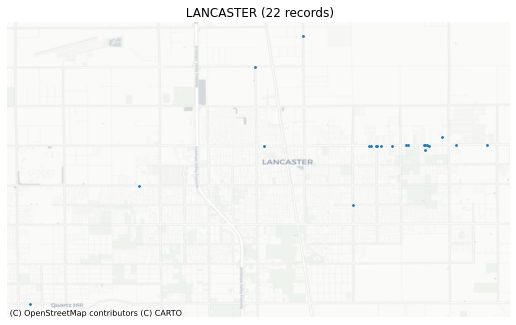

In [55]:
city_by(City = ' LANCASTER')

Next I'll use a loop to generate multiple outputs for our function.

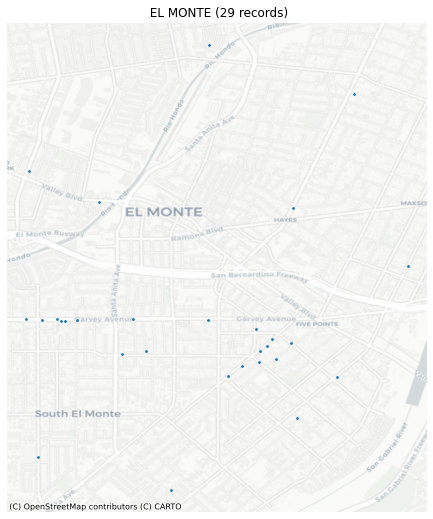

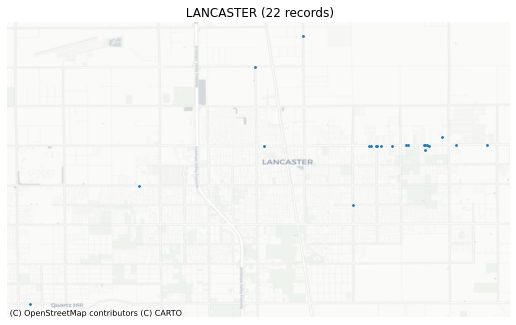

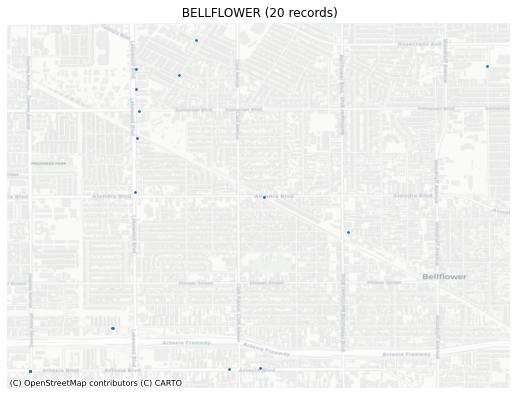

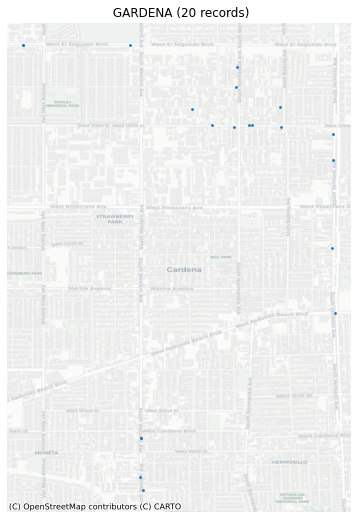

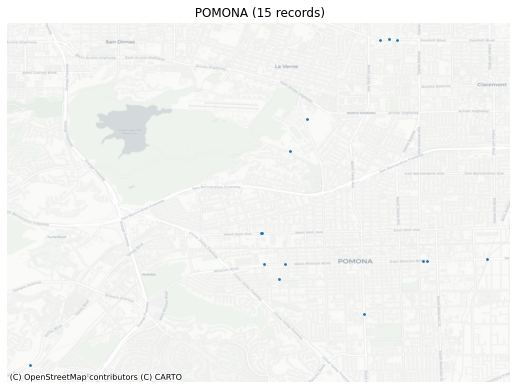

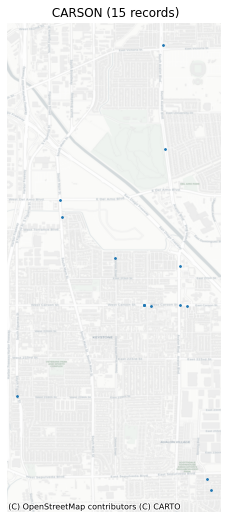

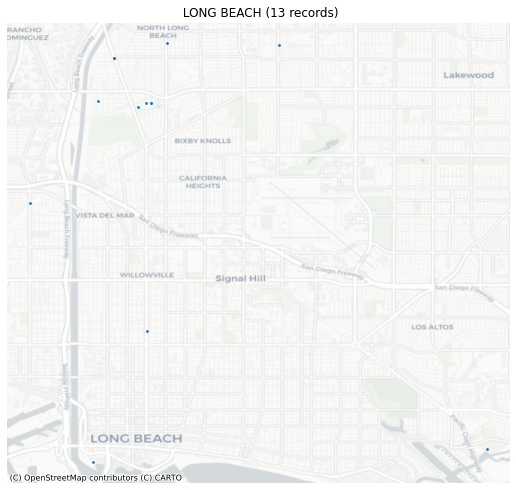

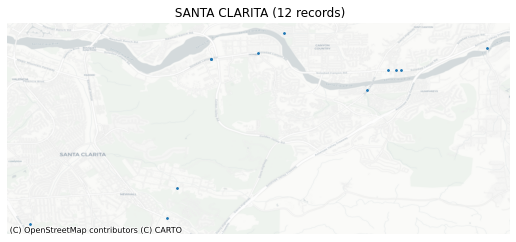

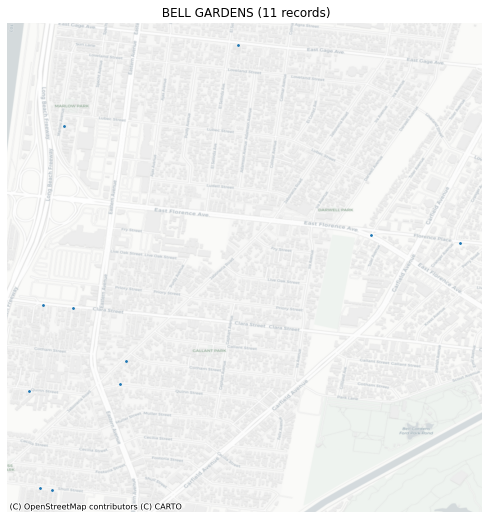

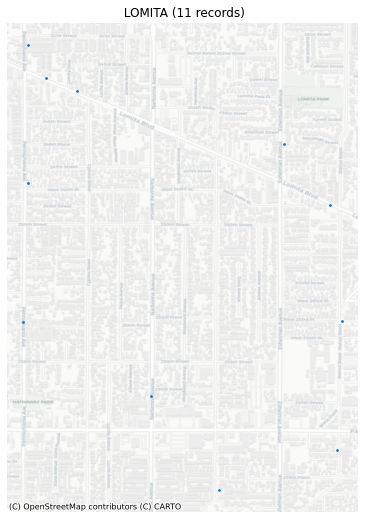

In [57]:
# loop through top 10 city
for City in top_10_city:
    city_by(City = City)

Now we know the top 10 cities with mobile home parks in the County. El Monter has the highest number, but they also seem to be more concentrated. This will help narro 